In [61]:
%pylab
%matplotlib inline

import pandas as pd
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pylab import pcolor
import scipy
import statsmodels.api as sm
import statsmodels.stats.api as sms

%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


/Users/xizizhu/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#Q1_A
'''
According to pt.1 we chose 'SalePrice' as continous variable
and we created a binary response variables 'those houses have sale prices 
over $200,000 

'''
data = pd.read_csv("ames_data.txt", sep = '\t')
SaleOver2k = (np.array([data['SalePrice']>200000])*1).reshape(2930,1)
#mean continous variable
print np.mean(data['SalePrice'])
#mean binary variable
print np.mean(SaleOver2k)

180796.060068
0.2924914675767918


In [3]:
#Q1_B, some codes borrowed from lecture9.ipynb
'''
the mean of sales price is approximately following the normal distribution 
with the following premise:

1, the population distribution of the mean of sales price follows normal distribution
according to CLT
2, it is then subsampled to this dataset, which is similar to t distribution

'''
def ConstCI(dataset):
    n = len(dataset)
    m = np.mean(dataset)
    sd = dataset.std()
    Q = scipy.stats.t.ppf(1-.05/2,n-1)
    print '95pct t-dist CI for avg diff = [%f,%f]'%(m-Q*sd,m+Q*sd)

ConstCI(data['SalePrice'])
ConstCI(SaleOver2k)

95pct t-dist CI for avg diff = [24156.291660,337435.828476]
95pct t-dist CI for avg diff = [-0.599478,1.184461]


In [ ]:
#Q1_C
'''
Positive: as long as the assumption is solid 
(most distribution's mean follows CLT), 
also with this many examples (data length: 1930), 
t distribution looks similar with normal distribution

'''


KS test for normality
KstestResult(statistic=1.0, pvalue=0.0)


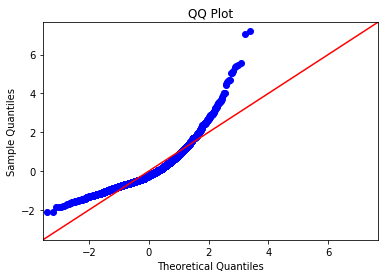

In [4]:
#Q1_D
print 'KS test for normality'
print scipy.stats.kstest(data['SalePrice'], 'norm')
fig = sm.graphics.qqplot(np.array(data['SalePrice']), scipy.stats.norm, fit=True, line='45')
plt.title('QQ Plot')
plt.show()
# Y does not look like standard normal at all, as expected
#1, KS test says it is not likely to be a normal distribution with pvalue  
#KS test rejects the null hypothesis that the sample comes from normal distribution
#with 99 percent confidence

In [50]:
#Q1_E, some codes borrowed from lecture9.ipynb
#here we use the binary varible street taking two values: Grvl and Pave
cm = sms.CompareMeans(
    sms.DescrStatsW(data['SalePrice'][data['Street']=='Grvl']),
    sms.DescrStatsW(data['SalePrice'][data['Street']=='Pave'])
)
print 'mean of sales price given Grvl', np.mean(data['SalePrice'][data['Street']=='Grvl'])
print 'mean of sales price Pave', np.mean(data['SalePrice'][data['Street']=='Pave'])
print '95pct t-test CI (equal vars):', cm.tconfint_diff()
print '95pct t-test CI (Welch\'s):', cm.tconfint_diff(usevar='unequal')


mean of sales price given Grvl 106663.333333
mean of sales price Pave 181100.92392
95pct t-test CI (equal vars): (-119675.87922365409, -29199.301950666224)
95pct t-test CI (Welch's): (-110515.777233212, -38359.40394110833)


permutation pval = 0.001998001998


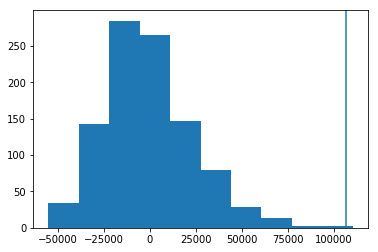

In [69]:
#Q1_E, some codes borrowed from lecture7.ipynb
t = np.array(data['Street']=='Grvl').astype('bool')
B = 1000
permutations = np.zeros(B)
y = data['SalePrice']
mean = np.mean(data['SalePrice'][data['Street']=='Grvl'])
for i in range(B):
    np.random.shuffle(t)
    permutations[i] = y.dot(t)/t.sum() - y.dot(~t)/(~t).sum()
hist(permutations)
axvline(x=mean)
print 'permutation pval =',(1.+(np.abs(permutations)>=np.abs(mean)).sum())/(B+1.)
#Conclusion: reject H0 that the treatment variable has an effect on outcome variable

In [ ]:
#Q1_F
'''
In term of making sense of part e casualy: 
Why is the type of road to property irrelavent to the price of the property?
First of, property's pricing is mostly related to the quality of the property
itself rather than anything.
Second of, it is a unbalanced sample where "Gravel" only has 
12 samples out of 1930 samples, 
which is not sufficient to make concrete conclusion. 
'''

In [ ]:
#Q2_A
